In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from mlxtend.plotting import plot_decision_regions

In [20]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam




In [21]:
x,y=make_moons(100,noise=0.25,random_state=2)

In [22]:
x

array([[ 1.04051282e+00, -2.33491352e-02],
       [-5.54741398e-01,  1.27013832e+00],
       [-7.23715066e-02, -1.77901205e-01],
       [-4.71961272e-02,  1.21883595e+00],
       [ 9.13794475e-01,  8.59883240e-01],
       [ 5.41150127e-01,  6.95140255e-01],
       [ 7.03026094e-01, -2.57985072e-01],
       [-1.33401091e-01,  1.06959481e+00],
       [-1.14287718e-01,  8.97688273e-01],
       [ 1.01150903e+00,  8.49916582e-01],
       [ 2.12537198e+00,  5.08605794e-01],
       [ 1.70010780e+00,  7.16265767e-01],
       [ 1.55439712e+00, -8.60585592e-01],
       [ 5.55027808e-01,  5.76836247e-01],
       [ 1.15481964e+00, -1.43219905e-01],
       [ 2.86145607e-01,  1.32282616e+00],
       [ 4.89545211e-01,  2.91536879e-01],
       [-6.67796665e-01,  7.81730273e-01],
       [ 2.23453555e-01,  3.34602767e-02],
       [ 1.18698241e+00, -3.39029325e-01],
       [-6.08507947e-01,  4.54265298e-01],
       [ 8.29543872e-01,  7.39089646e-01],
       [ 1.13299058e+00, -2.62270185e-01],
       [-1.

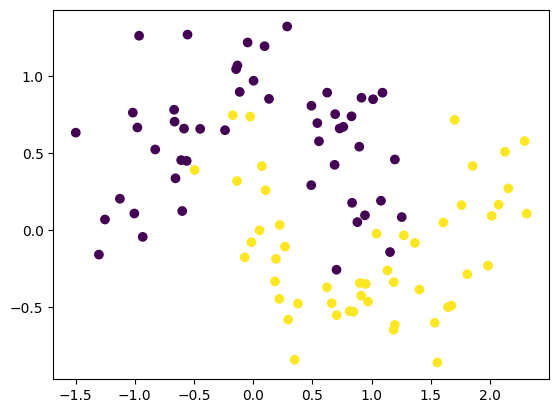

In [23]:
plt.scatter(x[:,0],x[:,1],c=y)

In [24]:
model1= Sequential()
model1.add(Dense(128,input_dim=2,activation ="relu"))
model1.add(Dense(128,activation='sigmoid'))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               384       
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
adam=Adam(learning_rate=0.01)

model1.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])


In [28]:
history1=model1.fit(x,y,epochs=2000, validation_split=0.2,verbose=0)

9600/9600 [==============================] - 22s 2ms/step


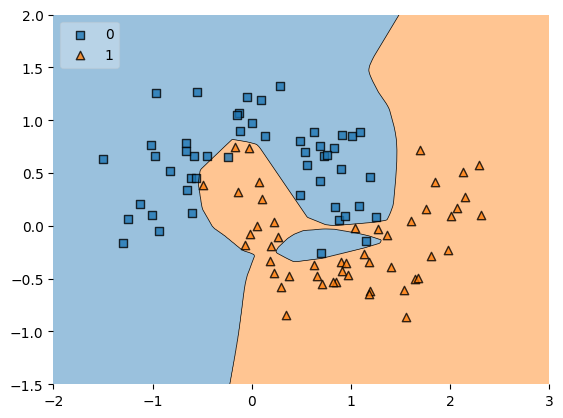

In [32]:
plot_decision_regions(x,y.astype('int'),clf=model1,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

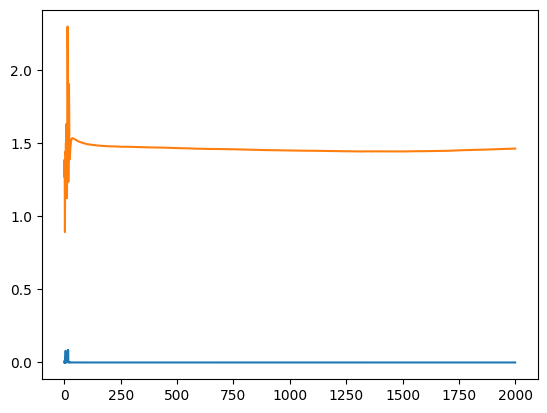

In [33]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

# L2-Regularization

In [36]:
model2=Sequential()
model2.add(Dense(128,input_dim=2,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model2.add(Dense(128,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model2.add(Dense(1,activation='sigmoid'))
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               384       
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
adam=Adam(learning_rate=0.01)

model2.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
history2=model2.fit(x,y,epochs=2000,validation_split=0.2,verbose=0)


9600/9600 [==============================] - 14s 1ms/step


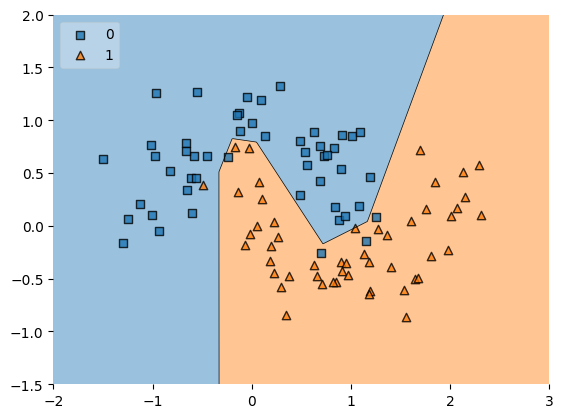

In [39]:
plot_decision_regions(x,y.astype(int),clf=model2,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

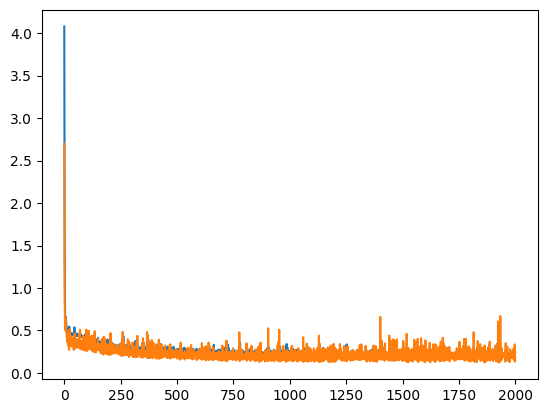

In [41]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [45]:
model1.get_weights()[0].shape



(2, 128)

In [49]:
model1_weight_layer1=model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)


<Axes: >

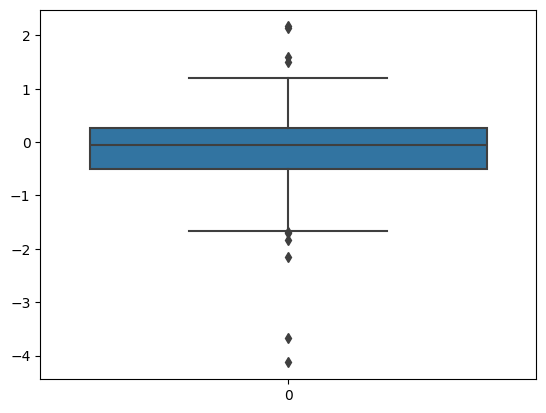

In [50]:
sns.boxplot(model1_weight_layer1)

<Axes: >

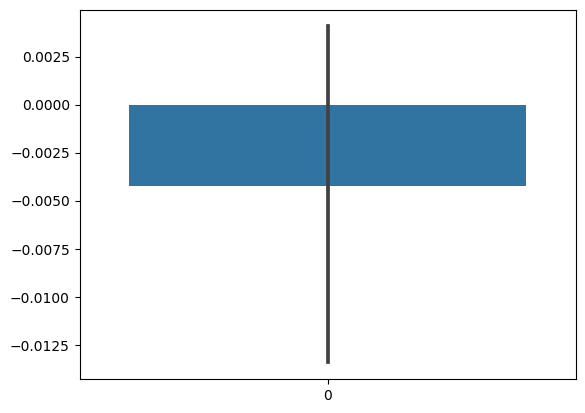

In [54]:
sns.barplot(model2_weight_layer1)

In [60]:
print(model1_weight_layer1.min())
print(model1_weight_layer1.max())
print('\n')
print(model2_weight_layer1.min())
print(model2_weight_layer1.max())


-4.128095
2.165711


-0.6712821
0.55023587


C:\Users\sandy\AppData\Local\Temp\ipykernel_24668\2224180084.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
C:\Users\sandy\AppData\Local\Temp\ipykernel_24668\2224180084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

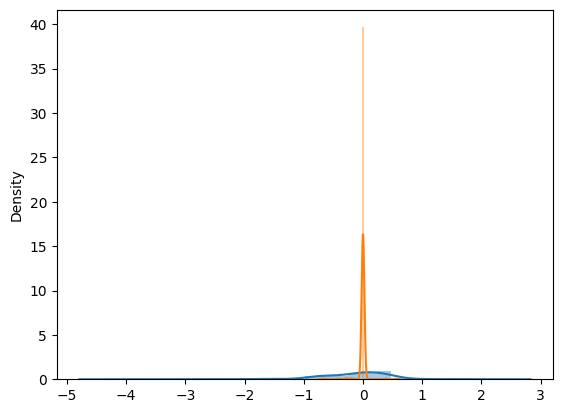

In [62]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

# L1- Regularization

In [66]:
from tensorflow.keras.regularizers import l1
model3=Sequential()
model3.add(Dense(128,input_dim=2,activation='relu',kernel_regularizer=l1(0.03)))
model3.add(Dense(128,activation='relu',kernel_regularizer=l1(0.03)))
model3.add(Dense(1,activation='sigmoid'))
model3.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 128)               384       
                                                                 
 dense_22 (Dense)            (None, 128)               16512     
                                                                 
 dense_23 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
adam=Adam(learning_rate=0.01)

model3.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
history3=model3.fit(x,y,epochs=2000,validation_split=0.2,verbose=0)


9600/9600 [==============================] - 14s 1ms/step


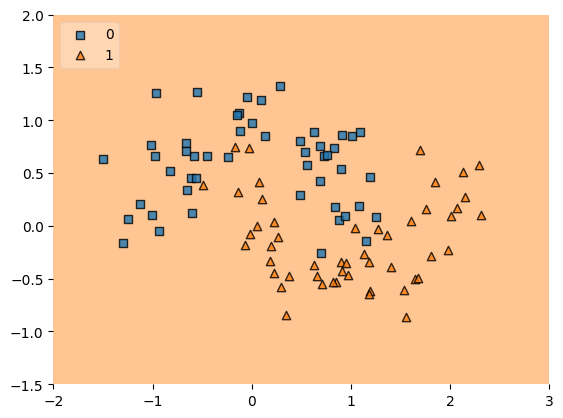

In [76]:
plot_decision_regions(x,y.astype(int),clf=model3,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

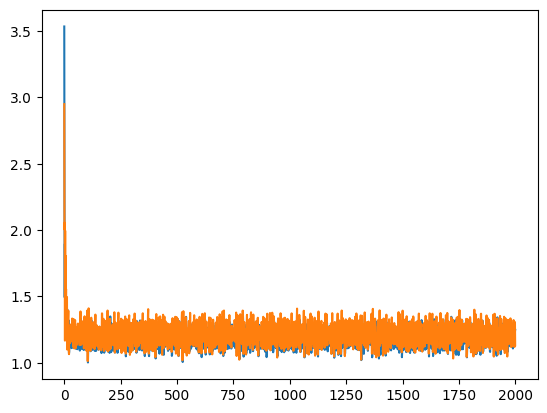

In [77]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])

In [78]:
model3_weight_layer1 = model3.get_weights()[0].reshape(256)


<Axes: >

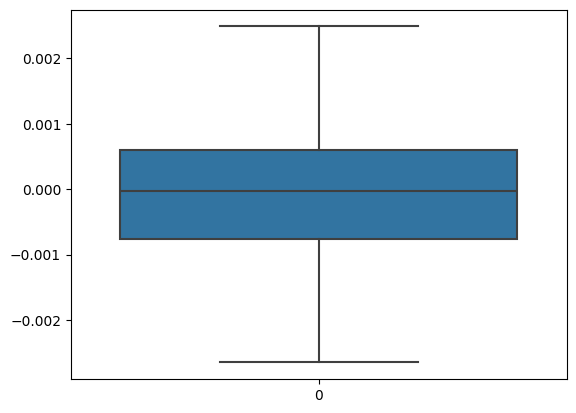

In [79]:
sns.boxplot(model3_weight_layer1)